# Clusterverfahren: DBSCAN
In diesem Notebook wollen wir das Clusterverfahren (Unsupervised Learning) DBSCAN verwenden.

Kurz zusammengefasst die Vor- und Nachteile von DBSCAN:
    
- Die Anzahl Cluster muss vorab nicht definiert werden (wie bei KMEANS).
- Es werden automatisch "Ausreißer" erkannt.
- Als Hyperparameter müssen $\epsilon$ (Distanz) und die min. Anzahl Objekte (*min_samples*), die im Bereich von $\epsilon$ liegen, definiert werden.
- DBSCAN sollte nicht bei vielen Features verwendet werden ("Fluch der Dimensionen").

Wenden wir DBSCAN am Standard-Datensatz *IRIS* an. Wir laden zuerst die Daten und standardisieren sie.

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(load_iris().data)



Nun erstellen wir das Modell:

In [2]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=4, metric="euclidean").fit(X)
print(model.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


Wir erstellen einen Scatterplot mit *seaborn* und färben die Objekte bezüglich ihres Clusters ein. Wir reduzieren mit Hilfe der PCA auf 2 Features, damit wir einen 2D-Plot erstellen können.

Ein Label-Wert von -1 bedeutet "Noise" (keinem Cluster zuordbar).

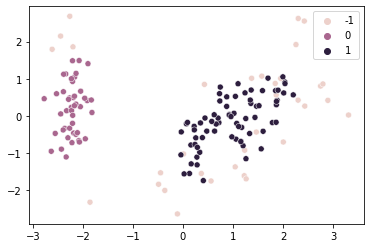

In [3]:
from sklearn.decomposition import PCA
import seaborn as sns

X_pca = PCA(n_components=2).fit_transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=model.labels_);


So richtig überzeugend ist das Ergebnis allerdings nicht! Es wurden nur 2 "echte" Cluster entdeckt, dafür jede Menge "Noise". Auch mit anderen Parametern erhalten wir kein wirlich gutes Ergebnis. Der IRIS-Datensatz eignet sich nicht wirklich, um die Stärke von DBSCAN zu verdeutlichen - ein Beispiel dafür, dass sich nicht jedes Modell für jede Problemstellung eignet. Versuchen wir es mit einem anderen Datensatz, den wir selbst erstellen:

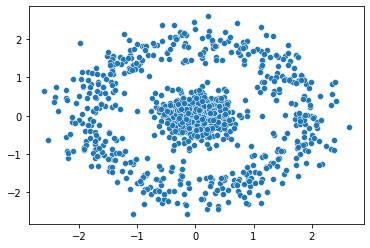

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(1000, factor=.1, noise=.15, random_state=23)
X_std = StandardScaler().fit_transform(X)

sns.scatterplot(x=X_std[:,0], y=X_std[:,1]);

Nun prüfen wir, wie gut DBSCAN diese Daten clustern kann:

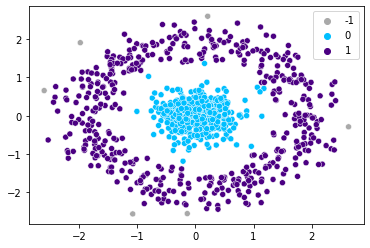

In [5]:
model = DBSCAN(eps=0.5, min_samples=25, metric="euclidean").fit(X_std)

sns.scatterplot(x=X_std[:,0], y=X_std[:,1], hue=model.labels_, 
                palette=["darkgrey", "deepskyblue", "indigo"]);


Hier erkennen wir ein sehr gutes Clustering!

Mit den Hyperparametern *eps* und *min_samples* muss man mit realen Daten ausgiebig testen, um ein gutes Ergebnis zu erhalten!